In [1]:
#Anish Almeida
#Credit Card Fraud Project
#Machine Learning 
#aa4170




In [2]:
# importing all relevant libraries/packages
# getting the library versions

import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))
print('Sklearn: {}'.format(sklearn.__version__))


Python: 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Numpy: 1.14.3
Pandas: 0.23.0
Matplotlib: 2.2.2
Seaborn: 0.8.1
Scipy: 1.1.0
Sklearn: 0.19.1


In [3]:
# importing all relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset from the csv file using pandas

import pandas as pd

dataset = pd.read_csv('creditcard.csv')

In [5]:
#Set up the data set

print(dataset.columns)

print(dataset.shape)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(284807, 31)


In [6]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
#Printing shape of data

#since data set is so large, I am using a fraction of it- only 50% of the whole set as a data sample
#using a larger sample would yeild a slightly better result, but for sake of computation-am reducing the sample size significantly

datasetnew=dataset.sample(frac=0.5,random_state=1)
print(datasetnew.shape)
print(datasetnew.describe())

(142404, 31)
                Time             V1             V2             V3  \
count  142404.000000  142404.000000  142404.000000  142404.000000   
mean    94636.653149       0.005281       0.002965       0.003540   
std     47530.885474       1.941833       1.650699       1.499189   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     54070.750000      -0.917749      -0.597082      -0.883249   
50%     84580.000000       0.022735       0.067128       0.180715   
75%    139223.250000       1.315881       0.808052       1.027217   
max    172784.000000       2.454930      21.467203       4.069865   

                  V4             V5             V6             V7  \
count  142404.000000  142404.000000  142404.000000  142404.000000   
mean        0.003841       0.000792      -0.004870      -0.001985   
std         1.414823       1.366677       1.324166       1.211335   
min        -5.560118     -42.147898     -26.160506     -41.506796   
25%        -0.844659

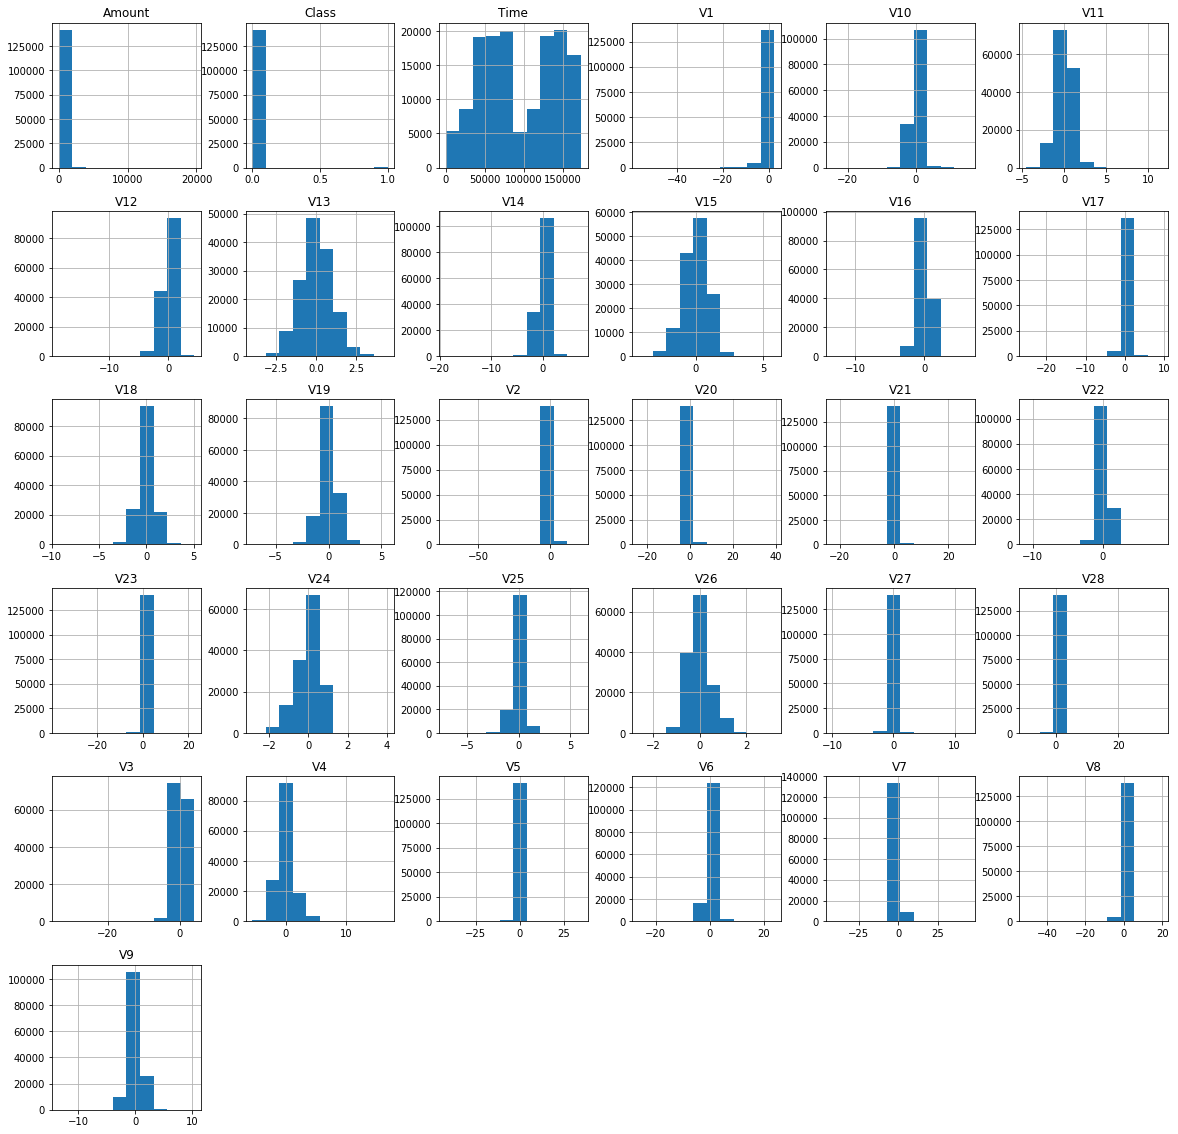

In [8]:
datasetnew.hist(figsize = (20, 20))
plt.show()

In [9]:
#Classifing the data
# Determine the amount of fraudulent cases

fraudulent_cases = datasetnew[datasetnew['Class'] == 1]
valid_cases = datasetnew[datasetnew['Class'] == 0]

percent_fraud = len(fraudulent_cases)/float(len(valid_cases))
print(percent_fraud)

print('Fraudulent Cases: {}'.format(len(datasetnew[datasetnew['Class'] == 1])))
print('Valid/Correct Transactions: {}'.format(len(datasetnew[datasetnew['Class'] == 0])))

0.0015966014193575613
Fraudulent Cases: 227
Valid/Correct Transactions: 142177


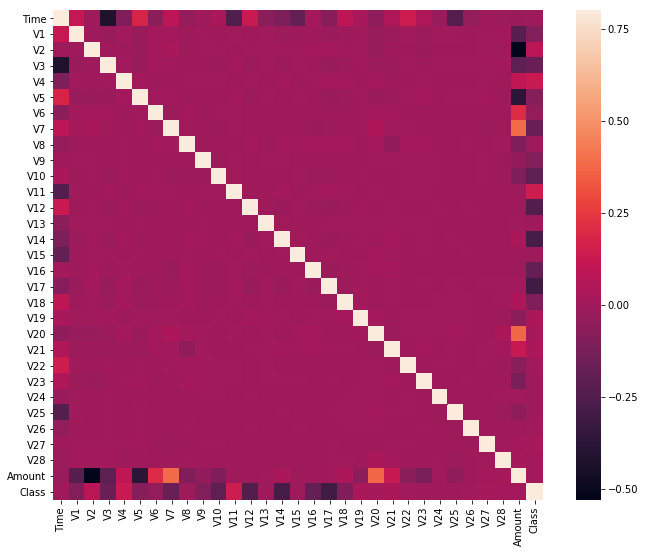

In [10]:
# Creating the Correlation matrix
corrmat = datasetnew.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


In [11]:
# Getting all the columns from the data
columns = datasetnew.columns.tolist()

# Filtering out the columns to remove data that we do not require
columns = [c for c in columns if c not in ["Class"]]

# Storing the variable that I am predicting on
target = "Class"

X = datasetnew[columns]
Y = datasetnew[target]

# Print shapes
print(X.shape)
print(Y.shape)

(142404, 30)
(142404,)


In [13]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# defining the random state
rand_state = 1

# defining all outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=percent_fraud,
                                        random_state=rand_state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=percent_fraud)}


#class sklearn.neighbors.LocalOutlierFactor(n_neighbors=20, algorithm=’auto’, leaf_size=30, metric=’minkowski’, p=2, metric_params=None, contamination=’legacy’, novelty=False, n_jobs=None)
#referenced LOF Method and code from: 
#https://github.com/scikit-learn/scikit-learn/blob/55bf5d9/sklearn/neighbors/lof.py#L19

#class sklearn.ensemble.IsolationForest(n_estimators=100, max_samples=’auto’, contamination=’legacy’, max_features=1.0, bootstrap=False, n_jobs=None, behaviour=’old’, random_state=None, verbose=0)[source]
#referenced Isolation Forest Method and code from:
#https://github.com/scikit-learn/scikit-learn/blob/55bf5d9/sklearn/ensemble/iforest.py#L27

In [14]:
# Finally Fitting the model
plt.figure(figsize=(9, 7))
n_outliers = len(fraudulent_cases)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fitting the data and tagging outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshaping the prediction values to: 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Running the classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

Isolation Forest: 317
0.9977739389342996
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    142177
          1       0.30      0.30      0.30       227

avg / total       1.00      1.00      1.00    142404

Local Outlier Factor: 439
0.9969172214263644
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    142177
          1       0.04      0.04      0.04       227

avg / total       1.00      1.00      1.00    142404



<Figure size 648x504 with 0 Axes>

In [ ]:
# We can see Isolation Forest Method yeilded better results